#### Merge Datasets to start a Global Stew Data for LIVE  
Adding 1. NYC 2. BTNF data in standard format to start the global data  
Adding a survey field, the entres will be unique to the survey name and will correspond to filtering in the front end.  

Maybe a view?

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib

dfny_eo = gpd.read_file(r"C:\Users\csucuogl\Dropbox\STEW-LIVE\Global Data\NY\EO_NY_MSA_Filter_4_JSONToFea1.shp")
dfny_up = gpd.read_file(r"C:\Users\csucuogl\Dropbox\STEW-LIVE\Global Data\NY\MSA_NY_Updated.shp")

#dfny_eo is the good one
#When filtered to N and some rough enteries, the length of Eo and Up matches. They are the same
dfny = dfny_eo[ (dfny_eo['Accept'] != "N") & ( ~dfny_eo['Stew_Gr'].isnull() ) ].copy() #I added these

display( dfny )

,OrgName,Stew_Gr,OrgCity,From990s,OrgStreet1,OrgState,OrgZip,PrimFocus,PopID,GlobalID,CreationDa,Creator,EditDate,Editor,Accept,geometry
0,100 BLOCK ASSOCIATION OF WEST 119TH STREET,-1,New York,Y,"152 West 119th St., Garden Level",NY,10026,Community improvement and capacity building,102142,cf70c34b-f1ef-4051-81e1-ebf26f83f4c6,2022-03-22,can_k_sucuoglu,2022-04-06,can_k_sucuoglu,Y,POINT Z (-73.94978 40.80457 0.00000)
1,100 FOR ALL INC,0,NEW YORK,Y,411 W 45TH ST APT 8,NY,10036-3591,"Water Resource, Wetlands Conservation and Mana...",811671576,e419b5e8-2d82-4713-abd4-2d9082d86a05,2022-03-22,can_k_sucuoglu,2022-04-06,can_k_sucuoglu,Y,POINT Z (-73.99185 40.76073 0.00000)
2,100 QUINCY COMMUNITY GARDEN,-1,Brooklyn,Y,79A Quincy Street,NY,11238,Food,100048,bba350d7-8c0c-43bb-a590-efe11a865965,2022-03-22,can_k_sucuoglu,2022-04-06,can_k_sucuoglu,Y,POINT Z (-73.95798 40.68612 0.00000)
3,1000 GRETAS FOUNDATION,0,NEW YORK,Y,600 THIRD 600 AVE FL 42,NY,10016-0000,Fund Raising and/or Fund Distribution,852597264,f7e11a74-4050-4380-900f-0d03e0b1850c,2022-03-22,can_k_sucuoglu,2022-04-06,can_k_sucuoglu,Y,POINT Z (-73.97579 40.74926 0.00000)
4,110 ROD AND GUN CLUB INC,0,VERBANK,Y,PO BOX 161,NY,12585-0161,Hunting or fishing club,141741194,0058ba1b-b9c5-485d-8b99-db8688482819,2022-03-22,can_k_sucuoglu,2022-04-06,can_k_sucuoglu,Y,POINT Z (-73.70250 41.71650 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,ZION CARES COMMUNITY DEVELOPMENT CORPORATION,0,JERSEY CITY,Y,521 BRAMHALL AVE,NJ,07304-2321,"Food Service, Free Food Distribution Programs",861542721,5bbcf2b4-2ae1-442c-b60a-eb0515456fba,2022-03-22,can_k_sucuoglu,2022-04-06,can_k_sucuoglu,Y,POINT Z (-74.07337 40.71425 0.00000)
4471,ZION YOUTH & FAMILY COMMUNITY CENTER OF ELMONT...,0,ELMONT,Y,2039 BELMONT AVE,NY,11003-2950,"Neighborhood Centers, Settlement Houses",800638108,25ffaf17-14eb-4796-90ea-175ff65903da,2022-03-22,can_k_sucuoglu,2022-04-06,can_k_sucuoglu,Y,POINT Z (-73.71593 40.69987 0.00000)
4472,ZLATOPOL YOUNG MENS ASSOCIATION,0,NEW YORK,Y,1755,NY,10128-0000,"Cemeteries, Burial Services",112599944,f9da6375-8f67-4c6f-9b40-f7bc603d2dff,2022-03-22,can_k_sucuoglu,2022-04-06,can_k_sucuoglu,Y,POINT Z (-73.95143 40.78273 0.00000)
4473,ZONTA INTERNATIONAL,0,HAWTHORNE,Y,121 CORNELL AVE,NJ,07506-1120,"YMCA, YWCA, YMCA, etc.",226055578,6d694abc-5212-45e0-8a88-20ce11be4eff,2022-03-22,can_k_sucuoglu,2022-04-06,can_k_sucuoglu,Y,POINT Z (-74.14320 40.96181 0.00000)


In [11]:
# Format NYC DATA
# Initial filter script is here: https://github.com/PrattSAVI/STEW_EO_Extract/blob/main/PY/220222_FilterData.py

'''
[ #Simplify Stew Map
    'OrgName',
    'OrgCity',
    'From990s',
    'OrgStreet1',
    'OrgState',
    'OrgZip',
    'PrimFocus',
    'PopID',
    'geometry']
'''

dfny = dfny[['OrgName', 'Stew_Gr', 'OrgCity', 'From990s', 'OrgStreet1', 'OrgState', 'OrgZip', 'PrimFocus', 'PopID', 'geometry']].copy()

dfny.head()

,OrgName,Stew_Gr,OrgCity,From990s,OrgStreet1,OrgState,OrgZip,PrimFocus,PopID,geometry
0,100 BLOCK ASSOCIATION OF WEST 119TH STREET,-1,New York,Y,"152 West 119th St., Garden Level",NY,10026,Community improvement and capacity building,102142,POINT Z (-73.94978 40.80457 0.00000)
1,100 FOR ALL INC,0,NEW YORK,Y,411 W 45TH ST APT 8,NY,10036-3591,"Water Resource, Wetlands Conservation and Mana...",811671576,POINT Z (-73.99185 40.76073 0.00000)
2,100 QUINCY COMMUNITY GARDEN,-1,Brooklyn,Y,79A Quincy Street,NY,11238,Food,100048,POINT Z (-73.95798 40.68612 0.00000)
3,1000 GRETAS FOUNDATION,0,NEW YORK,Y,600 THIRD 600 AVE FL 42,NY,10016-0000,Fund Raising and/or Fund Distribution,852597264,POINT Z (-73.97579 40.74926 0.00000)
4,110 ROD AND GUN CLUB INC,0,VERBANK,Y,PO BOX 161,NY,12585-0161,Hunting or fishing club,141741194,POINT Z (-73.70250 41.71650 0.00000)


In [14]:
# Format BTNF Data


dfbt = gpd.read_file(r"C:\Users\csucuogl\Dropbox\STEW-LIVE\Global Data\BTNF\BTNF_Groups.shp")
dfbt = dfbt[['OrgName', 'Stew_Gr', 'OrgCity', 'From990s', 'OrgStreet1', 'OrgState', 'OrgZip', 'PrimFocus', 'PopID', 'geometry']].copy()

dfbt


,OrgName,Stew_Gr,OrgCity,From990s,OrgStreet1,OrgState,OrgZip,PrimFocus,PopID,geometry
0,4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,0,GILLETTE,Y,412 S GILLETTE AVE,WY,82716-4200,Youth Development - Agricultural,742292462,POINT Z (-105.50445 44.29063 0.00000)
1,45TH ELEMENT INC,0,SALMON,Y,705 TAFT AVE,ID,83467-3256,Pollution Abatement and Control Services,871538708,POINT Z (-113.91056 45.18357 0.00000)
2,A F I M P A C T,0,AMERICAN FLS,Y,2890 COLD CREEK RD,ID,83211-5502,Parks and Playgrounds,264472746,POINT Z (-112.86837 42.71564 0.00000)
3,ABBAS HOUSE,0,RIVERTON,Y,PO BOX 1242,WY,82501-0157,"Boy Scouts, Girl Scouts, etc.",830305307,POINT Z (-108.83120 43.17110 0.00000)
4,ABC FOOD BANK,0,ATHOL,Y,PO BOX 416,ID,83801-0416,"Food Banks, Food Pantries",473150239,POINT Z (-116.66630 47.95600 0.00000)
...,...,...,...,...,...,...,...,...,...,...
1222,YOUNG WOMENS CHRISTIAN ASSOCIATION OF SWEETWAT...,0,ROCK SPRINGS,Y,PO BOX 1667,WY,82902-1667,"YMCA, YWCA, YMCA, etc.",830231698,POINT Z (-109.20240 41.58780 0.00000)
1223,YOUTH HUNTERS OF AMERICA,0,EAGLE,Y,4000 N EAGLE RD,ID,83616-2654,"Wildlife Preservation, Protection",813374887,POINT Z (-116.35525 43.73453 0.00000)
1224,YOUTH INCORPORATED,0,SHERIDAN,Y,PO BOX 240,WY,82801-0240,Camp,836006895,POINT Z (-106.83690 44.80590 0.00000)
1225,YOUTH WITH A MISSION IDAHO INC,0,KAMIAH,Y,PO BOX 1391,ID,83536-1391,"Boy Scouts, Girl Scouts, etc.",820408415,POINT Z (-116.05730 46.20510 0.00000)


In [15]:
# Add in survey names
# Always capital always accronyms

dfny['survey'] = 'NYC'
dfbt['survey'] = 'BTNF'

display( dfny.head(3) )
display( dfbt.head(3) )

,OrgName,Stew_Gr,OrgCity,From990s,OrgStreet1,OrgState,OrgZip,PrimFocus,PopID,geometry,survey
0,100 BLOCK ASSOCIATION OF WEST 119TH STREET,-1,New York,Y,"152 West 119th St., Garden Level",NY,10026,Community improvement and capacity building,102142,POINT Z (-73.94978 40.80457 0.00000),NYC
1,100 FOR ALL INC,0,NEW YORK,Y,411 W 45TH ST APT 8,NY,10036-3591,"Water Resource, Wetlands Conservation and Mana...",811671576,POINT Z (-73.99185 40.76073 0.00000),NYC
2,100 QUINCY COMMUNITY GARDEN,-1,Brooklyn,Y,79A Quincy Street,NY,11238,Food,100048,POINT Z (-73.95798 40.68612 0.00000),NYC


,OrgName,Stew_Gr,OrgCity,From990s,OrgStreet1,OrgState,OrgZip,PrimFocus,PopID,geometry,survey
0,4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,0,GILLETTE,Y,412 S GILLETTE AVE,WY,82716-4200,Youth Development - Agricultural,742292462,POINT Z (-105.50445 44.29063 0.00000),BTNF
1,45TH ELEMENT INC,0,SALMON,Y,705 TAFT AVE,ID,83467-3256,Pollution Abatement and Control Services,871538708,POINT Z (-113.91056 45.18357 0.00000),BTNF
2,A F I M P A C T,0,AMERICAN FLS,Y,2890 COLD CREEK RD,ID,83211-5502,Parks and Playgrounds,264472746,POINT Z (-112.86837 42.71564 0.00000),BTNF


In [16]:
# Similar formats

dfny['OrgCity'] = dfny['OrgCity'].str.upper()
dfny['OrgStreet1'] = dfny['OrgStreet1'].str.upper()

display( dfny.head(3) )
display( dfbt.head(3) )

,OrgName,Stew_Gr,OrgCity,From990s,OrgStreet1,OrgState,OrgZip,PrimFocus,PopID,geometry,survey
0,100 BLOCK ASSOCIATION OF WEST 119TH STREET,-1,NEW YORK,Y,"152 WEST 119TH ST., GARDEN LEVEL",NY,10026,Community improvement and capacity building,102142,POINT Z (-73.94978 40.80457 0.00000),NYC
1,100 FOR ALL INC,0,NEW YORK,Y,411 W 45TH ST APT 8,NY,10036-3591,"Water Resource, Wetlands Conservation and Mana...",811671576,POINT Z (-73.99185 40.76073 0.00000),NYC
2,100 QUINCY COMMUNITY GARDEN,-1,BROOKLYN,Y,79A QUINCY STREET,NY,11238,Food,100048,POINT Z (-73.95798 40.68612 0.00000),NYC


,OrgName,Stew_Gr,OrgCity,From990s,OrgStreet1,OrgState,OrgZip,PrimFocus,PopID,geometry,survey
0,4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,0,GILLETTE,Y,412 S GILLETTE AVE,WY,82716-4200,Youth Development - Agricultural,742292462,POINT Z (-105.50445 44.29063 0.00000),BTNF
1,45TH ELEMENT INC,0,SALMON,Y,705 TAFT AVE,ID,83467-3256,Pollution Abatement and Control Services,871538708,POINT Z (-113.91056 45.18357 0.00000),BTNF
2,A F I M P A C T,0,AMERICAN FLS,Y,2890 COLD CREEK RD,ID,83211-5502,Parks and Playgrounds,264472746,POINT Z (-112.86837 42.71564 0.00000),BTNF


,OrgName,Stew_Gr,OrgCity,From990s,OrgStreet1,OrgState,OrgZip,PrimFocus,PopID,geometry,survey
904,SHERIDAN ATHLETIC ASSN INC,False,SHERIDAN,Y,456 SUMNER ST,WY,82801-4861,Parks and Playgrounds,830171584,POINT Z (-106.95323 44.79278 0.00000),BTNF
3551,SHARK RIVER CLEAN UP COALITION INC,False,NEPTUNE,Y,PO BOX 2241,NJ,07754-2241,Environmental Beautification and Aesthetics,223836071,POINT Z (-74.03060 40.20170 0.00000),NYC
2933,OAKLAND CEMETERY,False,SAG HARBOR,Y,PO BOX 359,NY,11963-0007,Cemetery or burial activities,112471858,POINT Z (-72.31440 40.97090 0.00000),NYC
783,PAYETTE LAKE PROTECTIVE LEAGUE INC,False,MCCALL,Y,PO BOX 2329,ID,83638-2329,"Water Resource, Wetlands Conservation and Mana...",721604456,POINT Z (-115.47300 44.81220 0.00000),BTNF
1023,EAST 222ND STREET BLOCK ASSOCIATION,True,BRONX,Y,"P.O. BOX 421, WILLIAMSBRIDGE STATION",NY,10467-0421,Community improvement and capacity building,103594,POINT Z (-73.84900 40.88154 0.00000),NYC


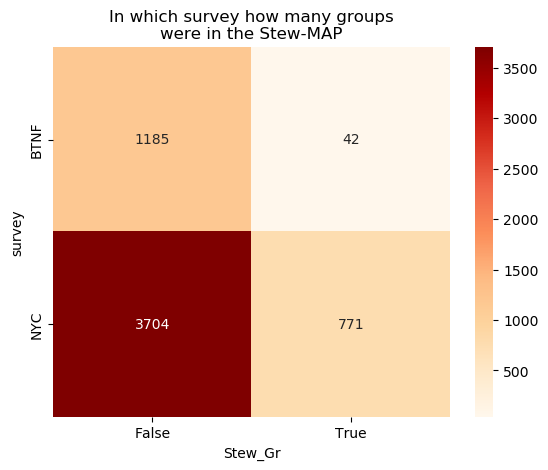

In [37]:
# Combine and Merge
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Merge dataset
df = dfny.append( dfbt )
df["Stew_Gr"] = np.where( df["Stew_Gr"] == "0" , False , True )

display( df.sample(5) )

pt = pd.pivot_table( data = df[['Stew_Gr','survey']] ,columns= "Stew_Gr", index='survey', aggfunc=len)

sns.heatmap(
    data=pt,
    annot=True,
    fmt='g',
    cmap = 'OrRd'
)
plt.title( "In which survey how many groups\nwere in the Stew-MAP" )
plt.show()

In [39]:
df.to_file(
    r'C:\Users\csucuogl\Dropbox\STEW-LIVE\Global Data\GlobalData.geojson',
    driver = 'GeoJSON',
    encoding = 'utf-8'
)

print('Data is exported')

Data is exported
